# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
data = p.read_csv("stroke.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['gender','ever_married','work_type','Residence_type','smoking_status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Text(0.5, 1.0, 'avg_glucose_level & bmi')

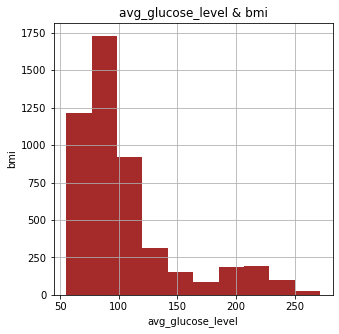

In [8]:
df['avg_glucose_level'].hist(figsize=(5,5), color='brown', alpha=1)
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')
plt.title('avg_glucose_level & bmi')

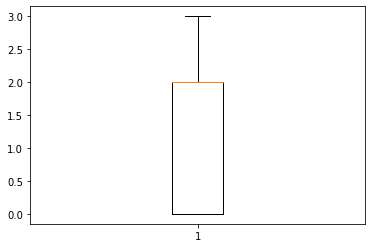

In [9]:
plt.boxplot(df['smoking_status'])
plt.show()

<AxesSubplot:xlabel='work_type'>

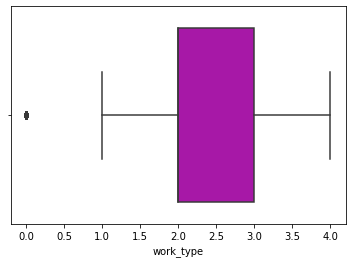

In [10]:
import seaborn as s
s.boxplot(df['work_type'], color='m')

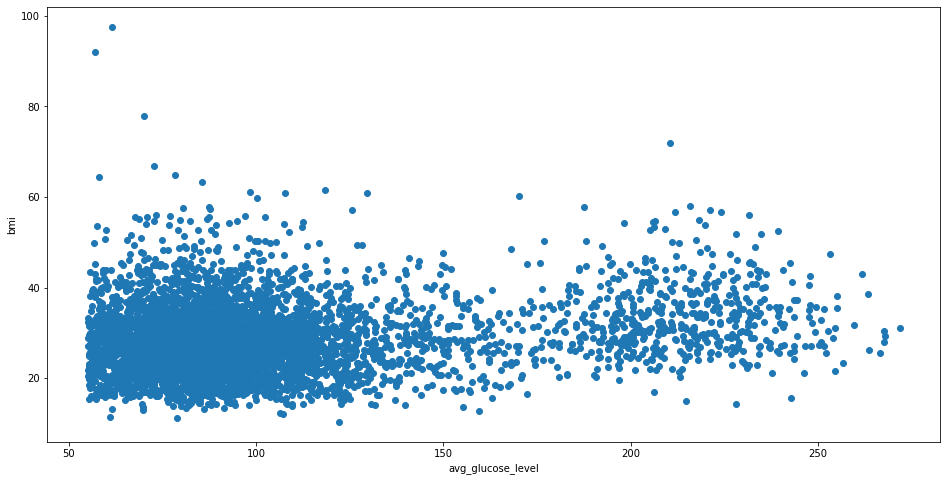

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['avg_glucose_level'],df['bmi'])
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('bmi')
plt.show()

2    57.26
3    15.79
4    13.67
0    12.83
1     0.45
Name: work_type, dtype: float64

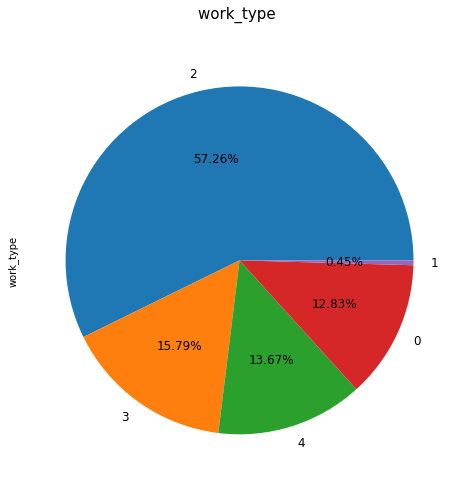

In [12]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'work_type')

<AxesSubplot:>

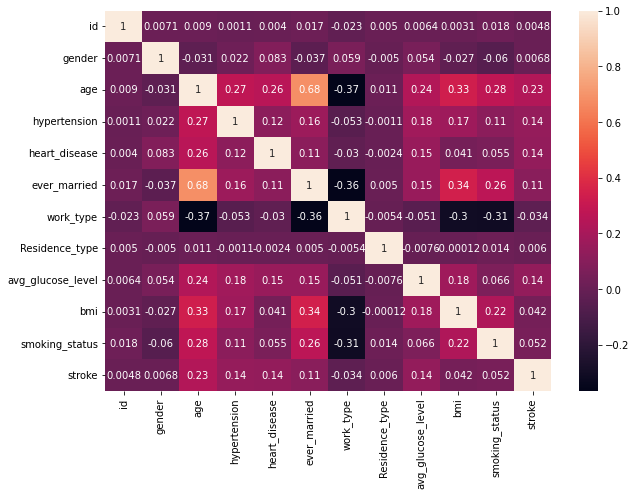

In [13]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(10,7))
s.heatmap(df.corr(), ax=ax, annot=True)

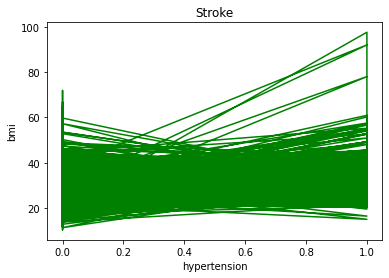

In [14]:
plt.plot(df["hypertension"], df["bmi"], color='g')
plt.xlabel('hypertension')
plt.ylabel('bmi')
plt.title('Stroke')
plt.show() 

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [16]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='stroke', axis=1)
#Response variable
y = df.loc[:,'stroke']

In [17]:
#We'll use a test size of 200%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  3927
Number of test dataset:  982
Total number of dataset:  4909
